Cycles
======

The [cycles](api/ktk.cycles.rst) module allows detecting cycles in TimeSeries, time-normalize these cycles and select the most repeatable ones.

.. warning::
    This module is experimental. Function names, signatures and implementations may change anytime.

In this tutorial, we will load kinetics data from wheelchair propulsion using a csv file, and then extract the cycles in these data.

In [1]:
import ktk
import pandas as pd
import numpy as np

# Load the csv file
df = pd.read_csv('data/timeseries/smartwheel.csv',
                 usecols=[18, 19, 20, 21, 22, 23],
                 names=['Forces[0]', 'Forces[1]', 'Forces[2]',
                        'Moments[0]', 'Moments[1]', 'Moments[2]'],
                 nrows=5000)

# Assign time to the DataFrame's index, where the sampling rate is 240 Hz.
df.index = np.arange(df.shape[0]) / 240

# Convert this DataFrame to a TimeSeries
ts = ktk.TimeSeries.from_dataframe(df)

At this point, we have a TimeSeries that contains forces and moments.

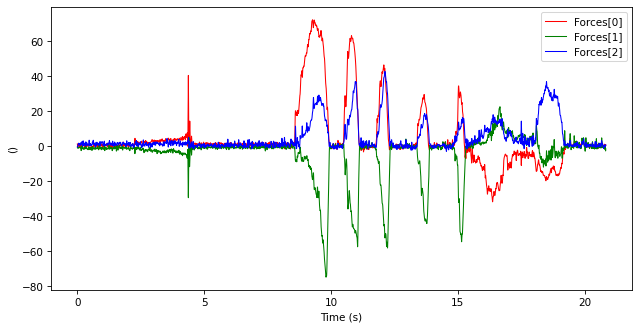

In [2]:
ts.plot('Forces')

To automatically detect the cycles in these data, we will add a third data, the total force, and use thresholds on this new data.

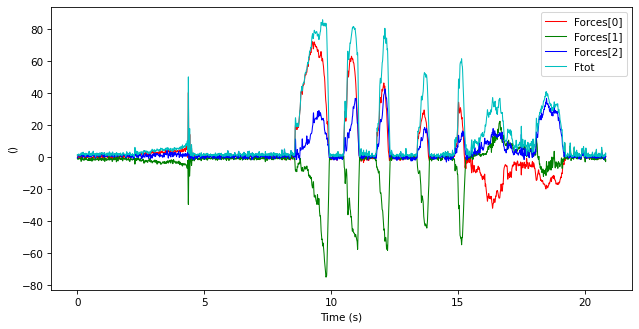

In [3]:
ts.data['Ftot'] = np.sqrt(np.sum(ts.data['Forces'] ** 2, 1))
ts.plot(['Forces', 'Ftot'])

Now let see how detecting cycles works. We will define the threshold values visually based on the figure above.

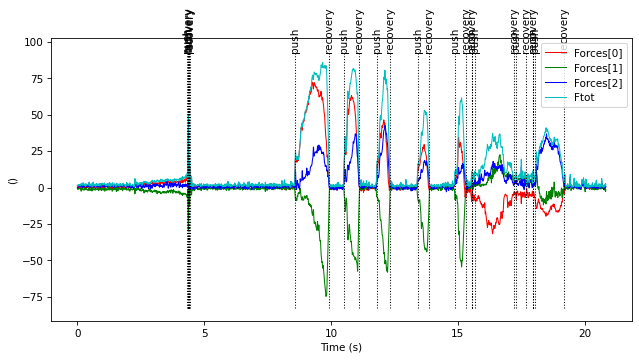

In [4]:
test = ktk.cycles.find_cycles(
    ts, 'Ftot',
    event_names=('push', 'recovery'),
    thresholds=(10, 5))
test.plot(['Forces', 'Ftot'])

We observe that several cycles were wrongly detected during the first spike (that is a synchronization spike and not a push). We can reject those cycles by specifying a minimal length for the push phase.

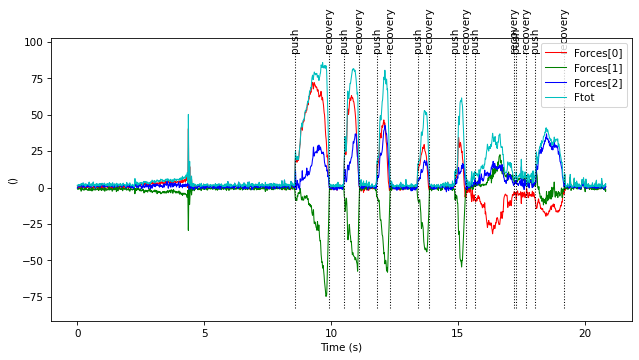

In [5]:
test = ktk.cycles.find_cycles(
    ts, 'Ftot',
    event_names=('push', 'recovery'),
    thresholds=(10, 5),
    minimum_length=0.1)
test.plot(['Forces', 'Ftot'])

We also see that the detected cycles at the end are erratic and include pushes that should be excluded. We can exclude these pushes by specifying a minimal value for the push phase.

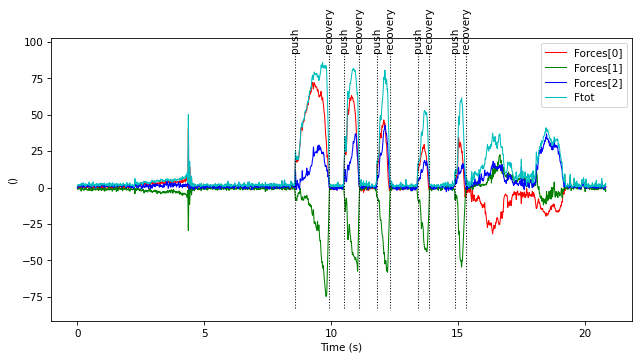

In [6]:
test = ktk.cycles.find_cycles(
    ts, 'Ftot',
    event_names=('push', 'recovery'),
    thresholds=(10, 5),
    minimum_length=0.1,
    minimum_height=50)
test.plot(['Forces', 'Ftot'])

For more information on cycles, please check the [API Reference](api/ktk.cycles.rst).